# **Neural Network (Multilayer perceptron) using plain NumPy**

In [143]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [144]:
seed = 2137

num_epochs = 250
lr = 0.1

In [145]:
X, Y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [147]:
m, n = X_train.shape

X_train = X_train.T
X_train = X_train/255.

X_test = X_test.T
X_test = X_test/255.

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [148]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

In [149]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [150]:
def ReLU_deriv(Z):
    return Z > 0

In [151]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [152]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [153]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [154]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(Y)
    print(predictions)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            print(f'Epoch {i}, train acc = {get_accuracy(predictions, Y)}')

    return W1, b1, W2, b2


In [155]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, lr, num_epochs)

[8 9 3 ... 5 4 9]
[4 9 8 ... 4 9 9]
Epoch 0, train acc = 0.08925
[8 9 3 ... 5 4 9]
[3 3 2 ... 1 2 3]
Epoch 10, train acc = 0.15225
[8 9 3 ... 5 4 9]
[3 3 2 ... 1 3 3]
Epoch 20, train acc = 0.286625
[8 9 3 ... 5 4 9]
[3 3 2 ... 1 3 3]
Epoch 30, train acc = 0.3530357142857143
[8 9 3 ... 5 4 9]
[3 3 2 ... 1 3 3]
Epoch 40, train acc = 0.4047321428571429
[8 9 3 ... 5 4 9]
[3 9 3 ... 1 3 9]
Epoch 50, train acc = 0.4623035714285714
[8 9 3 ... 5 4 9]
[3 9 3 ... 9 3 9]
Epoch 60, train acc = 0.5105178571428571
[8 9 3 ... 5 4 9]
[9 9 3 ... 9 3 9]
Epoch 70, train acc = 0.5451964285714286
[8 9 3 ... 5 4 9]
[5 9 3 ... 9 3 9]
Epoch 80, train acc = 0.5745
[8 9 3 ... 5 4 9]
[5 9 3 ... 9 9 9]
Epoch 90, train acc = 0.6035178571428571
[8 9 3 ... 5 4 9]
[5 9 3 ... 9 9 9]
Epoch 100, train acc = 0.6305357142857143
[8 9 3 ... 5 4 9]
[5 9 3 ... 5 9 9]
Epoch 110, train acc = 0.6540892857142857
[8 9 3 ... 5 4 9]
[5 9 3 ... 5 4 9]
Epoch 120, train acc = 0.6731964285714286
[8 9 3 ... 5 4 9]
[5 9 3 ... 5 4 9]
Epoch

In [156]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


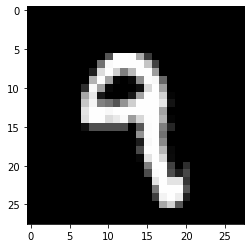

In [159]:
test_prediction(1, W1, b1, W2, b2)

In [158]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
print(f'test acc = {get_accuracy(dev_predictions, Y_test)}')

[7 4 4 ... 8 1 6]
[7 9 4 ... 8 1 6]
test acc = 0.7802142857142857
